# Craigslist Vehicle Listing Dataset

### Exploratory Data Analysis & the ETL Process

---

### Objective

The goal of this project is to practice my SQL and Python skills using a real-world dataset.

<b>The steps will be as follows:</b>

1) EXTRACT data from a database of Craigslist vehicle postings found on Kaggle into a Pandas DataFrame.

(Source: https://www.kaggle.com/austinreese/craigslist-carstrucks-data)

2) Clean and TRANSFORM the data into a smaller, more useful and manageable set in order to extract insights and visualize trends.

3) Use SQLite3 to create a database with multiple tables. 

Note: This is my second pass at cleaning up this data set. I had previously performed the ETL process on this dataset, and learned some things that I would like to change. 

For example:

1) I had originally included the descriptions in the final database. However, this added 850mb to the .db file, and did not add much value in our data visualization or analysis.

2) I had originally removed columns with greater than 40% nulls, which removed a lot of columns. This time around, I will reduce that threshold so that I can accomplish 2 things: have a smaller dataset and to have more columns to work with in my analysis.

3) I had originally done my exploratory analysis using only matplotlib. Since then, I have discovered seaborn, and will be using that to enhance the quality of my data visualization.


Once the ETL process is done, I will create a dashboard using Microsoft PowerBI to visualize the database.


---

### Description of Data

 This data set consists of all vehicles listed to Craigslist in the US. It contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories.
 
 ---


<b> Import Dependencies </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Extract & Explore Data


In [2]:
# Read the data from csv and put it in a dataframe

raw_df = pd.read_csv("../Resources/vehicles.csv")

In [3]:
# Explore column names

raw_df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [4]:
# Explore data set dimensions

raw_df.shape

(423857, 25)

<b>The data set has 423,857 rows. Many of these will be dropped once we remove null values.</b>

<b>The data set has 25 columns, but we will not need all  of them for this analysis.</b>

Since my goal is to practice SQL, I will turn this single dataset into a relational database, using the ID column as the primary key.

- Listings table: includes all the listing information that does not have to do with the location.
- Location table: includes region, county, state, latitude, and longitude columns.
    
In order to mimic a project in which there are multiple data sources, I will separate the dataset into two different tables.
I will perform the transformation process on just the main Listings table, and will not touch the Location table.

I will only perform the ETL process to reduce the number of rows on the Listings table. This means that the Location table will have many more rows than the Listings table. This will allow me to mimic uneven datasets when I create my dashboard.

---

### Transform the Data

    
Upon initial exploration, I do not see a use-case for the URL or VIN columns, so they will be dropped. Based on my previous experience with this dataset, the Description column will also be dropped, as it does not add much value to our analysis, but makes the final database much larger.



In [5]:
# Drop the columns that do not add any value to our analysis.

raw_df.drop(['url','region_url','vin','image_url','description'], axis=1, inplace=True)


In [6]:
# Set index for the main dataframe

raw_df.set_index('id')

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long
id,,,,,,,,,,,,,,,,,,,
7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,NaN,mn,46.8433,-92.2550
7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,NaN,mn,46.9074,-92.4638
7193375964,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,NaN,ct,41.1770,-73.1336
7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,NaN,nm,35.1868,-106.6650
7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,NaN,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184919761,duluth / superior,1600,2006.0,hyundai,sonata,fair,6 cylinders,gas,159980.0,clean,automatic,fwd,NaN,sedan,blue,NaN,mn,46.8348,-92.0742
7184844576,duluth / superior,9000,2003.0,toyota,sequoia limited,excellent,8 cylinders,gas,160000.0,clean,automatic,4wd,full-size,SUV,green,NaN,mn,46.9369,-91.9325
7184805809,duluth / superior,700,1994.0,ford,f-150,fair,6 cylinders,gas,212000.0,clean,manual,rwd,NaN,NaN,green,NaN,mn,46.7715,-92.1279


Now that we have removed excess columns and set the ID column to be the index, we can start pruning the dataset further. In order to do this, let's inspect the data.

In [7]:
# Inspect the remaining columns

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   region        423857 non-null  object 
 2   price         423857 non-null  int64  
 3   year          328743 non-null  float64
 4   manufacturer  313242 non-null  object 
 5   model         325384 non-null  object 
 6   condition     176719 non-null  object 
 7   cylinders     197679 non-null  object 
 8   fuel          327214 non-null  object 
 9   odometer      270585 non-null  float64
 10  title_status  327759 non-null  object 
 11  transmission  328065 non-null  object 
 12  drive         231119 non-null  object 
 13  size          102627 non-null  object 
 14  type          241157 non-null  object 
 15  paint_color   222203 non-null  object 
 16  county        0 non-null       float64
 17  state         423857 non-null  object 
 18  lat 

<b>Now we will separate this dataframe into two smaller dataframes</b> -- one that holds the listing info, and another that holds location info. We will leave the location dataframe with the original 423,857 listings, while performing our cleaning on the listings dataframe.

In [8]:
# First, the listings dataframe

listings_df = raw_df[['id','price','year','manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','size','type','paint_color']].copy()


In [9]:
# Next, the locations dataframe

location_df=raw_df[['id','region', 'state','lat','long']]


Let's take a look at the first 5 listings in each dataframe


In [10]:
listings_df.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,7184791621,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red
1,7184773187,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey
2,7193375964,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue
3,7195108810,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey
4,7184712241,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white


In [11]:
location_df.head()

,id,region,state,lat,long
0,7184791621,duluth / superior,mn,46.8433,-92.2550
1,7184773187,duluth / superior,mn,46.9074,-92.4638
2,7193375964,new haven,ct,41.1770,-73.1336
3,7195108810,albuquerque,nm,35.1868,-106.6650
4,7184712241,duluth / superior,mn,45.6836,-92.9648


<b>Now that we have our dataframes (which will eventually be two different tables in our SQL database) separated, we can begin to prune the number of rows from our listings dataframe. </b>

To do so, let's take a look at the number of null values in each column.

In [12]:
# Look at the number of null values in each column

listings_df.isna().sum()

id                   0
price                0
year             95114
manufacturer    110615
model            98473
condition       247138
cylinders       226178
fuel             96643
odometer        153272
title_status     96098
transmission     95792
drive           192738
size            321230
type            182700
paint_color     201654
dtype: int64

We see that condition, cylinders, size, and paint color all have over 200,000 null values. While we could get away with dropping some of these columns, it would be nice to have attributes like size and color to make our analysis a bit more interesting, even if it means we have a smaller dataset to work with.

For this reason, we'll be pretty lenient with our pruning, and we'll set our threshold at 75% null values for columns that will be removed.

<b>Now, we can create a function that will determine which columns will be removed.</b>

In [13]:
# Create a function that drops columns with >50% null values

null_cols = listings_df.isna().sum()

def null_check(na, threshold = 0.5):
    null_check_pass = []
    
    for i in na.keys():
        if (na[i])/listings_df.shape[0]<threshold:
            null_check_pass.append(i)
    return null_check_pass

# Create a new DataFrame that houses the columns with <50% null values

clean_listings_df = listings_df[null_check(null_cols)]

In [14]:
# Let's see which columns are left

clean_listings_df.columns

Index(['id', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color'],
      dtype='object')

Based on our decision to remove columns that are mostly null (50%+), we have dropped the condition, cylinder, and size columns.

<b>Now, we can remove rows with null values, which will reduce the overall size of our dataset.</b>

In [15]:
# Now we need to drop rows with missing values.

clean_listings_df = clean_listings_df.dropna()

In [16]:
# Let's see what we have left

clean_listings_df.shape

(149057, 12)

We are left with 149,057 listings. This is a 64% reduction in data size.

<b>Now, we will inspect the data to see if anything stands out.</b>

In [17]:
# Find unique values in each column and look for issues

# Categorical Columns
print('Categorical Columns: \n\n')
print(f'Unique Years: ',clean_listings_df.year.unique(),'\n')
print(f'Unique Manufacturers: ',clean_listings_df.manufacturer.unique(),'\n')
print(f'Unique Models: ',clean_listings_df.model.unique(),'\n')
print(f'Unique Fuel Types: ',clean_listings_df.fuel.unique(),'\n')
print(f'Unique Title Statuses: ',clean_listings_df.title_status.unique(),'\n')
print(f'Unique Transmission Types: ',clean_listings_df.transmission.unique(),'\n\n')
print(f'Unique Drive Types: ',clean_listings_df.drive.unique(),'\n\n')
print(f'Unique Types: ',clean_listings_df.type.unique(),'\n\n')
print(f'Unique Paint Colors: ',clean_listings_df.paint_color.unique(),'\n\n')



# Numberical Columns
print('Numerical Columns: \n\n')
clean_listings_df.describe()

Categorical Columns: 


Unique Years:  [2007. 2012. 2010. 2011. 2014. 2004. 2009. 2008. 1994. 1997. 2003. 2015.
 2016. 2006. 2017. 2013. 1964. 2019. 2002. 1989. 2000. 1990. 1967. 1998.
 2018. 1992. 2005. 1986. 1995. 2001. 1996. 2020. 1963. 1999. 1966. 1983.
 1981. 1979. 1960. 1991. 1959. 1993. 1982. 1988. 1987. 1969. 1934. 1980.
 1985. 1974. 1971. 1984. 2021. 1968. 1978. 1972. 1965. 1941. 1939. 1948.
 1940. 1975. 1957. 1962. 1950. 1976. 1958. 1932. 1973. 1970. 1955. 1956.
 1927. 1977. 1951. 1953. 1930. 1954. 1923. 1931. 1961. 1952. 1933. 1949.
 1936. 1947. 1946. 1937. 1929. 1935. 1926. 1928. 1924. 1938.] 

Unique Manufacturers:  ['gmc' 'ford' 'chevrolet' 'ram' 'buick' 'subaru' 'nissan' 'hyundai'
 'dodge' 'toyota' 'lexus' 'volvo' 'jaguar' 'chrysler' 'jeep' 'acura' 'kia'
 'honda' 'volkswagen' 'bmw' 'pontiac' 'lincoln' 'cadillac' 'mazda'
 'infiniti' 'mercedes-benz' 'saturn' 'audi' 'mercury' 'ferrari' 'fiat'
 'rover' 'mitsubishi' 'mini' 'tesla' 'land rover' 'datsun'
 'harley-davidson' 'mor

,id,price,year,odometer
count,1.490570e+05,1.490570e+05,149057.000000,1.490570e+05
mean,7.189076e+09,3.220359e+04,2011.058058,1.002033e+05
std,4.740514e+06,6.458734e+06,7.691465,1.034051e+05
min,7.178302e+09,0.000000e+00,1923.000000,0.000000e+00
25%,7.185491e+09,5.700000e+03,2008.000000,4.700000e+04
50%,7.190033e+09,1.143600e+04,2013.000000,9.357700e+04
75%,7.193369e+09,1.986700e+04,2016.000000,1.383010e+05
max,7.195225e+09,2.490531e+09,2021.000000,1.000000e+07


<b>Let's clean up the column names and capitalize the first letter in each entry so that the data will be cleaner in the dashboard.</b>

In [18]:
# Fix column names

clean_listings_df.columns = ['ID','Price', 'Year', 'Make', 'ModelName', 'Fuel', 'Mileage', 'Title', 'Transmission', 'Drive', 'Type', 'Color']

# Capitalize entries

clean_listings_df['Make']=clean_listings_df['Make'].str.capitalize()
clean_listings_df['ModelName']=clean_listings_df['ModelName'].str.capitalize()
clean_listings_df['Fuel']=clean_listings_df['Fuel'].str.capitalize()
clean_listings_df['Title']=clean_listings_df['Title'].str.capitalize()
clean_listings_df['Transmission']=clean_listings_df['Transmission'].str.capitalize()
clean_listings_df['Type']=clean_listings_df['Type'].str.capitalize()
clean_listings_df['Color']=clean_listings_df['Color'].str.capitalize()

While we're at it, we should do the same for the location dataframe so that it can be in the same format when we export it later.

In [19]:
# Fix column names - locations dataframe

location_df.columns = ['ID', 'Region', 'State', 'Latitude', 'Longitude']

<b> Upon inspection, we see a few things that need to be addressed:</b>

    - The minimum price is $0, which can not be true
    
    - The maximum price is over $2 Billion, which needs to be checked (it's likely a phone number)
    
    - Some things are misspelled or mislabeled, like "Porche" instead of "Porsche"
    
    - There is a manufacturer entry for "Harley Davidson", which is a motorcycle brand
    
    - The "minimum" of the year column is 1911. While it's possible this is a real listing, we should limit the dataset by removing outliers
    
    
    
    
<b> Let's start by plotting some charts to try and visualize outliers. </b>

<b> We can begin with price: </b>

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb0905af10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb09073610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb0905abb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb09073cd0>],
 'fliers': [],
 'means': []}

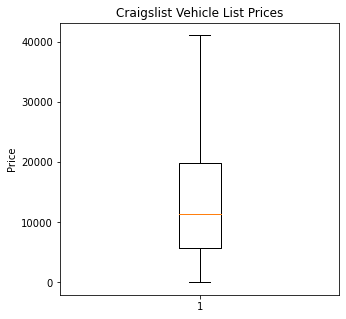

In [20]:
# Box plot on prices to see the normal range (not including outliers):

fig = plt.figure(figsize=(5,5))
plt.title("Craigslist Vehicle List Prices")
plt.ylabel("Price")
plt.boxplot('Price', data=clean_listings_df,showfliers=False)

We see that values over 40,000 are considered outliers. This makes sense, since most of the cars that are sold on Craigslist will be cheaper cars. However, there are many cars beyond this price point that are legitimate listings. 

Since we know there are some listings with 10-digit price tags, we can assume that this data is skewed by some bad data. Looking at cars over $100,000 will help us determine how many high-dollar listings we could potentially exclude.

In [21]:
# Look at the listings greater than $100,000 and see if we can exclude them

clean_listings_df[clean_listings_df['Price']>100000]

,ID,Price,Year,Make,ModelName,Fuel,Mileage,Title,Transmission,Drive,Type,Color
807,7187052743,106899,2004.0,Ferrari,360 modena spyder,Gas,34123.0,Clean,Automatic,rwd,Convertible,Red
2735,7192116434,1495000,2014.0,Lexus,Is 250,Gas,79577.0,Clean,Automatic,rwd,Sedan,Grey
6099,7194507428,112900,2020.0,Chevrolet,Corvette,Gas,718.0,Clean,Automatic,rwd,Coupe,Black
6403,7193595054,104888,2020.0,Chevrolet,Corvette,Gas,2011.0,Clean,Automatic,rwd,Coupe,Black
8356,7195095066,114000,2020.0,Chevrolet,Corvette z51,Gas,265.0,Clean,Automatic,rwd,Coupe,Red
...,...,...,...,...,...,...,...,...,...,...,...,...
394705,7194939287,119980,1969.0,Chevrolet,Camaro restomod,Gas,21545.0,Clean,Automatic,rwd,Coupe,Custom
399412,7187548159,119995,2020.0,Chevrolet,Corvette stingray,Gas,932.0,Clean,Automatic,rwd,Coupe,Grey
402534,7184297439,124975,2015.0,Audi,R8 v10,Gas,16000.0,Clean,Automatic,4wd,Coupe,Black
409983,7193568300,104888,2020.0,Chevrolet,Corvette,Gas,2011.0,Clean,Automatic,rwd,Coupe,Black


There are 118 listings above $100,000. This is an insignificant amount in relation to the size of our full data set, so we can safely exclude it.

Downsides of excluding it are that we are losing listings for some high-dollar cars, such as Audi R8s and Ferraris.

Based on this list, only a few of the cars should be at their listed prices. 
In some cases, it appears there was an extra '0' added to the number, or two 0's if they are missing a decimal place.
In others, it looks like a phone number was used in the list price section.
There are also a few that look like they used an arbitrary number.
Based on this list, we can ignore the listings above 

In [22]:
# Exclude listings above $100,000.

clean_listings_df=clean_listings_df[clean_listings_df['Price']<100000]
clean_listings_df.shape

(148939, 12)

We are left with 148,939 listings, a 0.1% reduction.

We can also remove cars with a $0 price tag, as these are not the actual sale prices for these cars.

In [23]:
# Remove cars with $0 price

clean_listings_df = clean_listings_df[clean_listings_df['Price']>0]

clean_listings_df.shape

(138048, 12)

We are left with 138,048 listings, a 7.3% reduction.

Let's look at a histogram distribution of listing prices.

<AxesSubplot:xlabel='Price', ylabel='Count'>

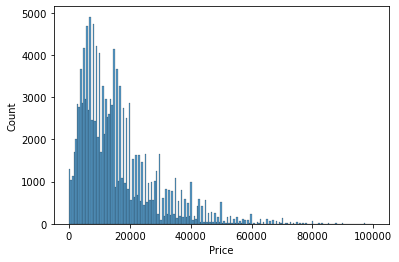

In [24]:
sns.histplot(data=clean_listings_df, x="Price")

Since we are talking about cars, it is worth looking at the thousands of listings under $1,000.

In [25]:
# Look at listings below $1k

clean_listings_df[clean_listings_df['Price']<1000]


,ID,Price,Year,Make,ModelName,Fuel,Mileage,Title,Transmission,Drive,Type,Color
579,7193371115,1,2010.0,Gmc,Sierra 1500,Gas,186049.0,Clean,Automatic,rwd,Truck,Silver
672,7187599219,499,1994.0,Ford,Taurus gl,Gas,175300.0,Clean,Automatic,fwd,Sedan,Red
1106,7187350668,600,1981.0,Volkswagen,Dasher model 323,Diesel,69000.0,Clean,Other,fwd,Sedan,White
1118,7186565333,900,2006.0,Chevrolet,Impala,Gas,189600.0,Clean,Automatic,fwd,Sedan,Red
1291,7194857946,800,2007.0,Chrysler,Town and country van,Gas,186000.0,Clean,Automatic,fwd,Mini-van,Red
...,...,...,...,...,...,...,...,...,...,...,...,...
422791,7193513547,5,2013.0,Subaru,Wrx,Gas,76000.0,Clean,Manual,4wd,Hatchback,Black
423248,7186771435,500,1992.0,Subaru,Legacy,Gas,200000.0,Clean,Automatic,4wd,Hatchback,Purple
423299,7185153516,900,1997.0,Pontiac,Grand prix,Gas,168319.0,Clean,Automatic,fwd,Coupe,White
423568,7193446369,500,2001.0,Ford,Taurus,Gas,140000.0,Clean,Other,fwd,Sedan,Blue


We see that there are 1909 listings under $1,000. 

Since we are trying to understand the typical used car market, and since there are people who search for cars under $1,000, it is worth keeping these listings. It would provide for some interesting analysis on cars that are cheaply and plentily available.

<b>Now, for the other end of the spectrum:</b>

Looking back at the histogram, it appears that the distribution tapers down beyond the $80,000 mark. 

Let's look at the listings between $80-100 thousand to see if they should be included in our dataset.

In [26]:
clean_listings_df[clean_listings_df['Price']>80000]


,ID,Price,Year,Make,ModelName,Fuel,Mileage,Title,Transmission,Drive,Type,Color
1996,7187776823,81999,2019.0,Ford,F350 powerstroke platinum,Diesel,17328.0,Clean,Automatic,4wd,Truck,White
2396,7186006224,81999,2019.0,Ford,F350 diesels powerstroke,Diesel,17328.0,Clean,Automatic,4wd,Truck,White
2568,7185369022,81999,2019.0,Ford,F350 diesel power stroke,Diesel,17328.0,Clean,Automatic,4wd,Truck,White
2702,7194616684,89995,2020.0,Ford,F-350 lifted platinum crew cab power stroke di...,Other,12504.0,Clean,Automatic,4wd,Pickup,Blue
4298,7194797636,94500,2019.0,Bmw,M5 competition,Gas,9904.0,Clean,Other,4wd,Sedan,Grey
...,...,...,...,...,...,...,...,...,...,...,...,...
398488,7194616864,89995,2020.0,Ford,F-350 lifted platinum crew cab power stroke di...,Other,12504.0,Clean,Automatic,4wd,Pickup,Blue
398849,7184351109,82995,2015.0,Bmw,M5 30 jahre,Gas,7700.0,Clean,Automatic,rwd,Sedan,Grey
402512,7184739850,89988,1957.0,Chevrolet,Cameo,Gas,5601.0,Clean,Automatic,rwd,Other,Purple
410758,7189182921,90000,2000.0,Jeep,Wrangler tj,Gas,121000.0,Lien,Manual,4wd,Suv,Grey


Most of the listings here seem legitimate, and there appear to be lots of newer model cars and higher end diesel trucks, which are often in this price range. Of course, there are a few outliers, but we can ignore them for now.

<b>Let's look at mileage now.</b>

In [27]:
# Descriptive statistics

clean_listings_df['Mileage'].describe()

count    1.380480e+05
mean     1.016075e+05
std      1.062498e+05
min      0.000000e+00
25%      4.795300e+04
50%      9.500000e+04
75%      1.400462e+05
max      1.000000e+07
Name: Mileage, dtype: float64

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

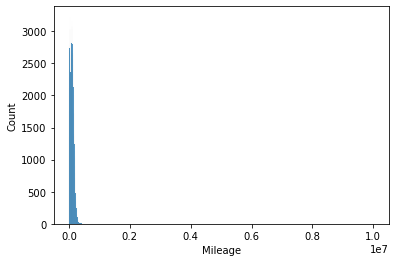

In [28]:
# Histogram distribution

sns.histplot(data=clean_listings_df, x="Mileage")


{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb09f858b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb09fa4820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb085178e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb09fd3ee0>],
 'fliers': [],
 'means': []}

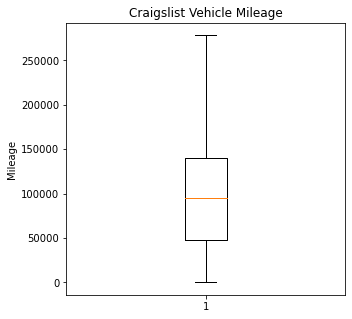

In [29]:
# Let's visualize odometer readings

fig = plt.figure(figsize=(5,5))
plt.title("Craigslist Vehicle Mileage")
plt.ylabel("Mileage")
plt.boxplot('Mileage', data=clean_listings_df,showfliers=False)

We see that the max mileage is around 1 million, whereas the boxplot shows us that numbers above 300,000 are outliers. The histogram shows us that most of the listings are well under the 300,000 mile mark.

Let's take a look at listings with over 300,000 miles.

In [30]:
clean_listings_df[clean_listings_df['Mileage']>300000]


,ID,Price,Year,Make,ModelName,Fuel,Mileage,Title,Transmission,Drive,Type,Color
9,7184708752,12995,2004.0,Ram,2500,Diesel,309621.0,Clean,Automatic,4wd,Truck,Custom
771,7195096726,19500,1967.0,Chevrolet,C10,Gas,1000000.0,Clean,Automatic,rwd,Truck,Green
1526,7184092588,1700,1997.0,Chevrolet,Cheyenne 1500,Gas,2564237.0,Clean,Automatic,rwd,Truck,White
1720,7184946265,3950,2011.0,Toyota,Corolla le 4dr sedan,Gas,336400.0,Clean,Automatic,fwd,Sedan,Black
2186,7186817290,6800,2002.0,Chevrolet,Silverado,Gas,320000.0,Clean,Automatic,4wd,Truck,White
...,...,...,...,...,...,...,...,...,...,...,...,...
422107,7179748368,4985,2011.0,Nissan,Frontier,Gas,346927.0,Clean,Automatic,rwd,Truck,Red
422883,7184961129,21500,2014.0,Audi,Q5,Gas,797000.0,Clean,Automatic,4wd,Suv,Blue
423219,7186975836,3300,1999.0,Gmc,Suburban,Gas,426200.0,Clean,Automatic,4wd,Suv,Blue
423469,7195137451,11500,2015.0,Honda,Civic coupe,Gas,780000.0,Clean,Manual,4wd,Coupe,Blue


We see that there are 785 listings above 300,000 miles. We can remove these. While there are some that appear to have accurate mileages listed, there are many that appear to be arbitrary numbers. At any rate, most used car shoppers would not be interested in cars with such high mileage, so we can safely exclude them without affecting our outcomes much.

Let's remove the high mileage listings and look at our histogram again.

In [31]:
# Remove listings >300k miles

clean_listings_df = clean_listings_df[clean_listings_df['Mileage']<300000]

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

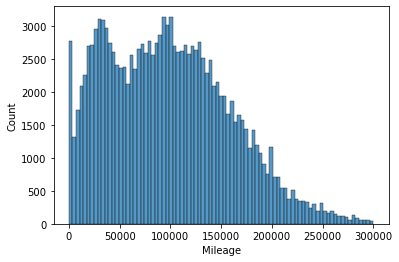

In [32]:
# Histogram distribution

sns.histplot(data=clean_listings_df, x="Mileage")

We see that this is a much cleaner distribution of listings. Let's see how many listings remain.

In [33]:
# See remaining listings

clean_listings_df.shape

(137212, 12)

There are 137,212 cars remaining, which is a 0.1% decrease.



<b>Next, we can look at model years to determine whether some of the older listings should be included.</b>

It would be worthwhile keeping legitimate listings for older cars, as we could then perform some analysis on classic and vintage cars that are availble on Craigslist.

In [34]:
# Look at listings prior to 1985

clean_listings_df[clean_listings_df['Year']<1985]


,ID,Price,Year,Make,ModelName,Fuel,Mileage,Title,Transmission,Drive,Type,Color
50,7184080602,27000,1964.0,Dodge,Polara,Gas,36000.0,Clean,Automatic,rwd,Coupe,Red
118,7187986347,26500,1967.0,Chevrolet,C-10,Gas,500.0,Clean,Automatic,4wd,Pickup,Black
330,7180617522,7200,1963.0,Chevrolet,Corvair monza,Gas,105311.0,Clean,Manual,rwd,Convertible,Red
496,7185637009,2500,1966.0,Ford,F100,Gas,100755.0,Clean,Manual,rwd,Pickup,Black
663,7185170223,7000,1963.0,Pontiac,Tempest,Gas,96000.0,Clean,Manual,rwd,Convertible,Brown
...,...,...,...,...,...,...,...,...,...,...,...,...
423567,7186596995,12900,1972.0,Chevrolet,Nova pro street / drag,Gas,1.0,Clean,Automatic,rwd,Coupe,Yellow
423769,7186741190,4500,1977.0,Buick,Lesabre,Gas,96660.0,Clean,Automatic,rwd,Coupe,Black
423802,7195143461,6500,1983.0,Toyota,Pick up diesel,Diesel,165103.0,Clean,Manual,rwd,Pickup,Brown
423811,7185734413,28000,1957.0,Chevrolet,210 coupe,Gas,96731.0,Clean,Manual,rwd,Coupe,Grey


We see that there are 1847 cars from before 1985. Let's look at the histogram distribution of prices to see if they make sense.

<AxesSubplot:xlabel='Price', ylabel='Count'>

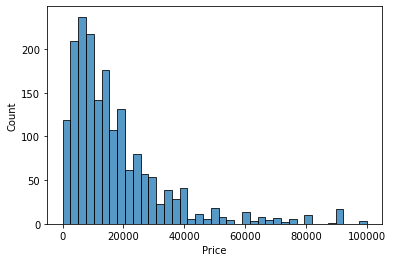

In [35]:
# Let's look at the prices of these cars

sns.histplot(data=clean_listings_df[clean_listings_df['Year']<1985], x="Price")

We see a good distribution of prices for these classic cars -- let's leave them in the data set.

<b>We have now trimmed our dataset from 423,857 listings to just 137,212.</b>

Let's look at our remaining dataset and see if there are any other changes we should make.

In [36]:
clean_listings_df

,ID,Price,Year,Make,ModelName,Fuel,Mileage,Title,Transmission,Drive,Type,Color
4,7184712241,16995,2007.0,Gmc,Sierra classic 2500hd,Diesel,254217.0,Clean,Automatic,4wd,Truck,White
5,7184711787,13995,2012.0,Ford,F-150,Gas,188406.0,Clean,Automatic,4wd,Truck,Grey
6,7184710887,7995,2010.0,Chevrolet,Equinox,Gas,108124.0,Clean,Automatic,4wd,Suv,Grey
7,7184710023,8995,2011.0,Chevrolet,Traverse,Gas,178054.0,Clean,Automatic,4wd,Suv,White
8,7184709156,10995,2014.0,Ford,Explorer,Gas,170259.0,Clean,Automatic,4wd,Suv,White
...,...,...,...,...,...,...,...,...,...,...,...,...
423850,7195116716,750,2002.0,Saturn,Sc2,Gas,40000.0,Missing,Manual,fwd,Coupe,Blue
423851,7195116656,4800,2002.0,Ford,Mustang gt coupe,Gas,58000.0,Clean,Automatic,rwd,Coupe,Blue
423852,7184919761,1600,2006.0,Hyundai,Sonata,Gas,159980.0,Clean,Automatic,fwd,Sedan,Blue
423853,7184844576,9000,2003.0,Toyota,Sequoia limited,Gas,160000.0,Clean,Automatic,4wd,Suv,Green


Different types of vehicles would appeal to different buyers. If someone is looking for an SUV, they would not be cross-shopping with a small sedan. Let's take a look at the Type column and see if we can clean things up there.

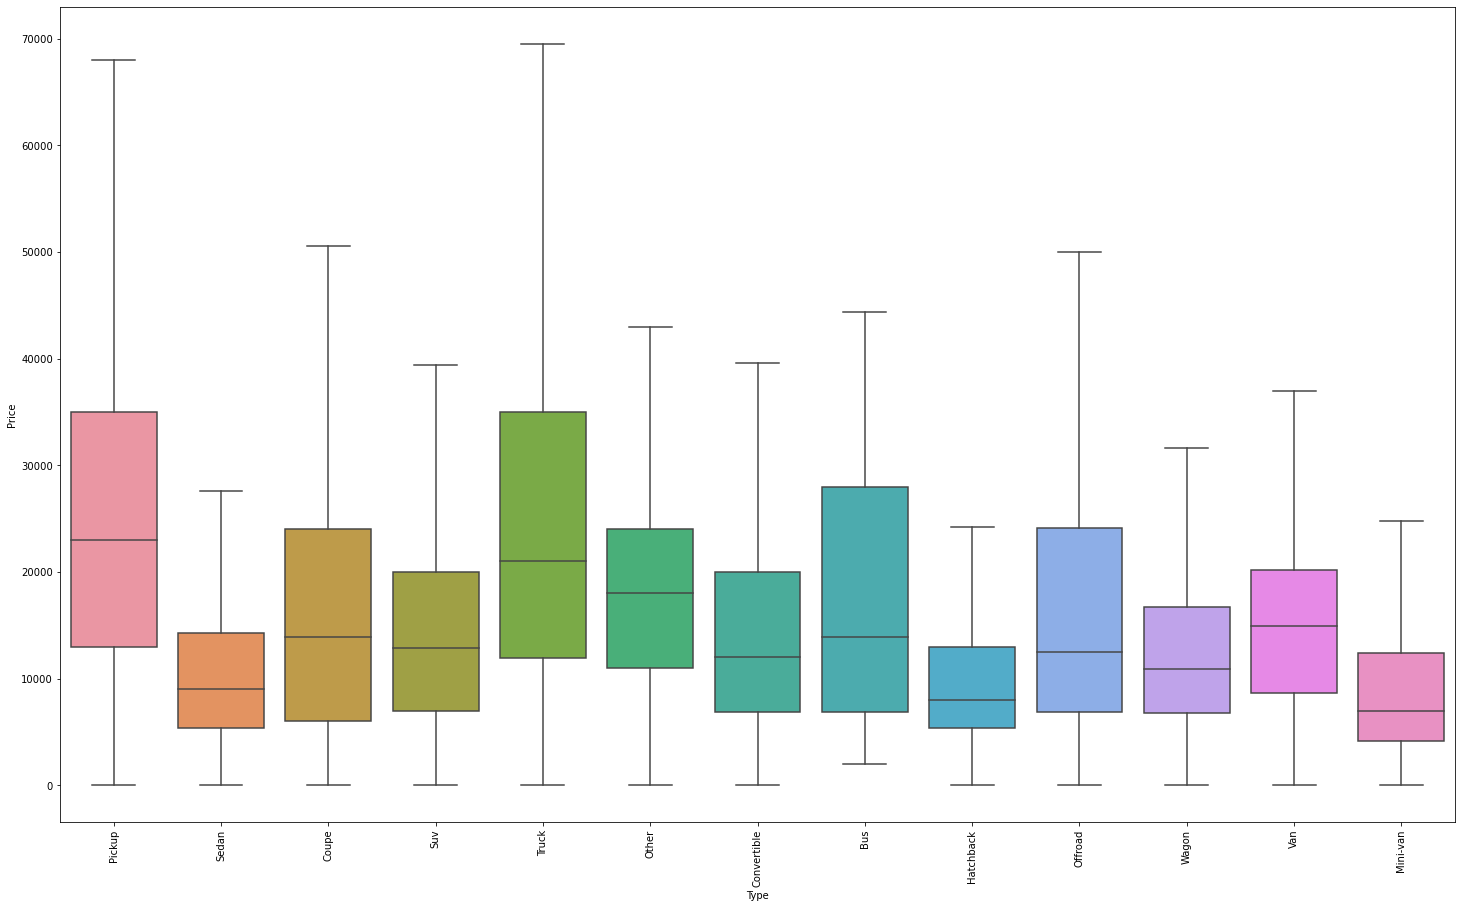

In [37]:
# Boxplot for price distribution for each body type without outliers

clean_listings_df=clean_listings_df.sort_values(by=['Price'],ascending=False)
plt.figure(figsize=(25,15))
sns.boxplot(x=clean_listings_df.Type, y=clean_listings_df.Price, showfliers=False)
plt.xticks(rotation= 90)
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

We see that there are some overlapping categories:
    
    - Pickup and Truck - these have similar price distributions as well
    - Van and Mini-Van - these have fairly different price characteristics, but owners of these cars may have selected the wrong classification
    

In [38]:
# Combine Pickup and Truck

clean_listings_df['Type'] = clean_listings_df['Type'].replace(['Pickup'],'Truck')


In [39]:
# Combine Van and Mini-van

clean_listings_df['Type'] = clean_listings_df['Type'].replace(['Mini-van'],'Van')

<b>Now let's fix some typos and blatantly-wrong listings.</b>

Some examples of things we need to fix:
    
    - There are some Teslas listed as gas or hybrids, which cannot be true as they only make electric cars.

    - Porsche is misspelled.

In [40]:
# Change Porche to Porsche

clean_listings_df['Make'] = clean_listings_df['Make'].replace(['Porche'],'Porsche')

In [41]:
# Change all Teslas to electric

clean_listings_df.loc[clean_listings_df.Make == 'Tesla', 'Fuel'] = 'Electric'

<b>Upon looking at the Model column, we can see that lots of listings include the trim for individual models. We should split the Model column into Model and Trim columns. We can accomplish this by splitting them after the first word.</b>

In [42]:
# Split Model into Model & Trim

modelsplit = pd.DataFrame(clean_listings_df.ModelName.str.split(' ',1).tolist(), columns = ['Model','Trim'])


In [43]:
modelsplit.head()

,Model,Trim
0,F150,None
1,Charger,police
2,F-350,None
3,Gto,None
4,3500,limited 4x4


In [44]:
# Add split model and trim to the end of the dataframe, then remove the original model column, then reorganize columns

clean_listings_df['Model']=modelsplit['Model']
clean_listings_df['Trim']=modelsplit['Trim']

clean_listings_df.head()

,ID,Price,Year,Make,ModelName,Fuel,Mileage,Title,Transmission,Drive,Type,Color,Model,Trim
391026,7191361470,99999,1978.0,Ford,F150,Gas,62000.0,Clean,Other,rwd,Truck,Red,NaN,NaN
216907,7188391353,99999,2016.0,Dodge,Charger police,Gas,119934.0,Clean,Automatic,4wd,Sedan,Grey,NaN,NaN
160267,7190772823,99995,2019.0,Ford,F-350,Diesel,5000.0,Clean,Automatic,4wd,Truck,White,NaN,NaN
101863,7185193582,99000,1970.0,Pontiac,Gto,Gas,169000.0,Clean,Automatic,rwd,Coupe,Custom,Regal,None
25044,7180615238,99000,2020.0,Ram,3500 limited 4x4,Diesel,18800.0,Clean,Automatic,4wd,Truck,Red,F550,4x4


In [45]:
# Drop the original model column

clean_listings_df.drop(columns =["ModelName"], inplace = True) 

clean_listings_df.head()

,ID,Price,Year,Make,Fuel,Mileage,Title,Transmission,Drive,Type,Color,Model,Trim
391026,7191361470,99999,1978.0,Ford,Gas,62000.0,Clean,Other,rwd,Truck,Red,NaN,NaN
216907,7188391353,99999,2016.0,Dodge,Gas,119934.0,Clean,Automatic,4wd,Sedan,Grey,NaN,NaN
160267,7190772823,99995,2019.0,Ford,Diesel,5000.0,Clean,Automatic,4wd,Truck,White,NaN,NaN
101863,7185193582,99000,1970.0,Pontiac,Gas,169000.0,Clean,Automatic,rwd,Coupe,Custom,Regal,None
25044,7180615238,99000,2020.0,Ram,Diesel,18800.0,Clean,Automatic,4wd,Truck,Red,F550,4x4


In [46]:
# Reorder the columns

clean_listings_df=clean_listings_df[['ID','Price', 'Year','Make','Model','Trim','Fuel', 'Mileage', 'Title', 'Transmission', 'Drive', 'Type', 'Color']]

clean_listings_df.head()

,ID,Price,Year,Make,Model,Trim,Fuel,Mileage,Title,Transmission,Drive,Type,Color
391026,7191361470,99999,1978.0,Ford,NaN,NaN,Gas,62000.0,Clean,Other,rwd,Truck,Red
216907,7188391353,99999,2016.0,Dodge,NaN,NaN,Gas,119934.0,Clean,Automatic,4wd,Sedan,Grey
160267,7190772823,99995,2019.0,Ford,NaN,NaN,Diesel,5000.0,Clean,Automatic,4wd,Truck,White
101863,7185193582,99000,1970.0,Pontiac,Regal,None,Gas,169000.0,Clean,Automatic,rwd,Coupe,Custom
25044,7180615238,99000,2020.0,Ram,F550,4x4,Diesel,18800.0,Clean,Automatic,4wd,Truck,Red


Now we have our cleaned listings dataset, as well as an uncleaned dataset of locations. We can now load our finished tables into a database that can be used in the PowerBI dashboard in the next portion of the project.

---

### Loading the Data

We will use SQLite3 to create a database file with two tables.

In [47]:
# Import Dependencies to create a database engine and define the database string:

from pathlib import Path

Path('../Resources/craigslist_cars.db').touch()

In [48]:
import sqlite3

conn = sqlite3.connect('../Resources/craigslist_cars.db')
c = conn.cursor()

In [49]:
# Create the listings table

c.execute('''CREATE TABLE listings(ID, Price, Year, Make, Model, Trim, Fuel, Mileage, Title, Transmission, Drive, Type, Color)''')

In [50]:
clean_listings_df.to_sql('listings', conn, if_exists='append', index=False)

In [51]:
# Create the location table
c.execute('''CREATE TABLE location(ID, Region, State, Latitude, Longitude)''')

location_df.to_sql('location', conn, if_exists='append', index=False)

Now the data has been loaded into an SQLite database in the Resources folder.
It is set up in the following way:

- The `listings` table contains our cleaned listings with 137,212 rows
- The `location` table includes data for the original 423,857 rows

The first time I performed the ETL process, I had left in the description for each of the 423,857 listings. This resulted in a database file that was over 1GB. 

By removing the description table, the new database size is just 30MB. This will make file transfers, data visualization, and any other data manipulation much more manageable.

### Data Visualization

<b>We will create a PowerBI dashboard to visualize the database, but before that, we should take a preliminary look at some possible visualizations using seaborn.


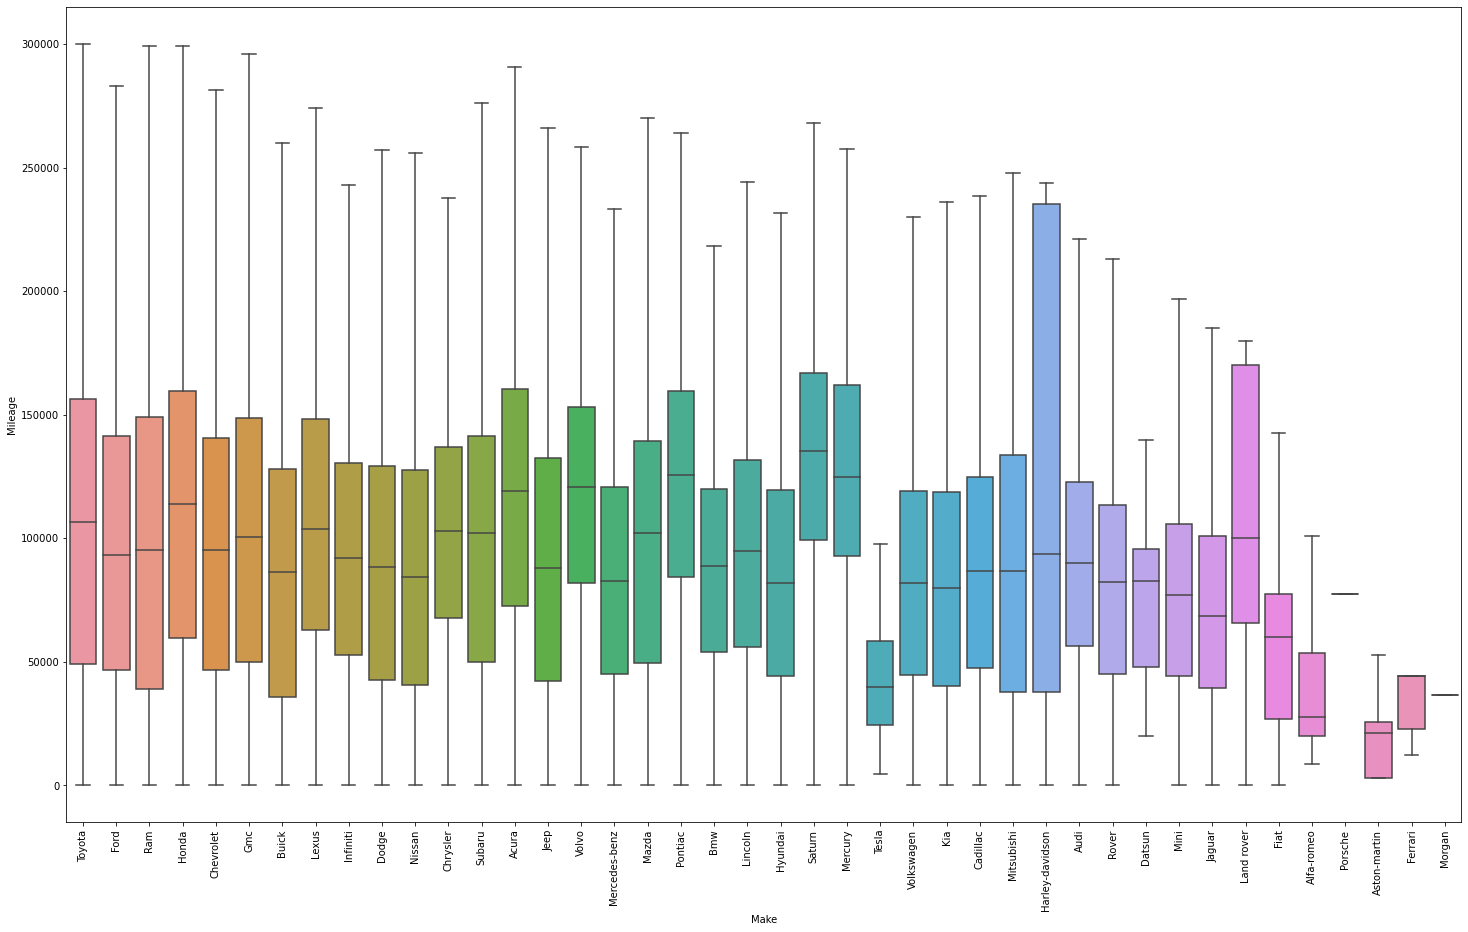

In [52]:
# Boxplot of mileage distribution for each manufacturer without outliers

clean_listings_df=clean_listings_df.sort_values(by=['Mileage'],ascending=False)
plt.figure(figsize=(25,15))
sns.boxplot(x=clean_listings_df.Make, y=clean_listings_df.Mileage, showfliers=False)
plt.xticks(rotation= 90)
plt.xlabel('Make')
plt.ylabel('Mileage')
plt.show()

This boxplot shows us that common car brands like Toyota, Ford, and Honda have higher mileage than more exotic brands like Aston-Martin, Ferrari, and Porsche.

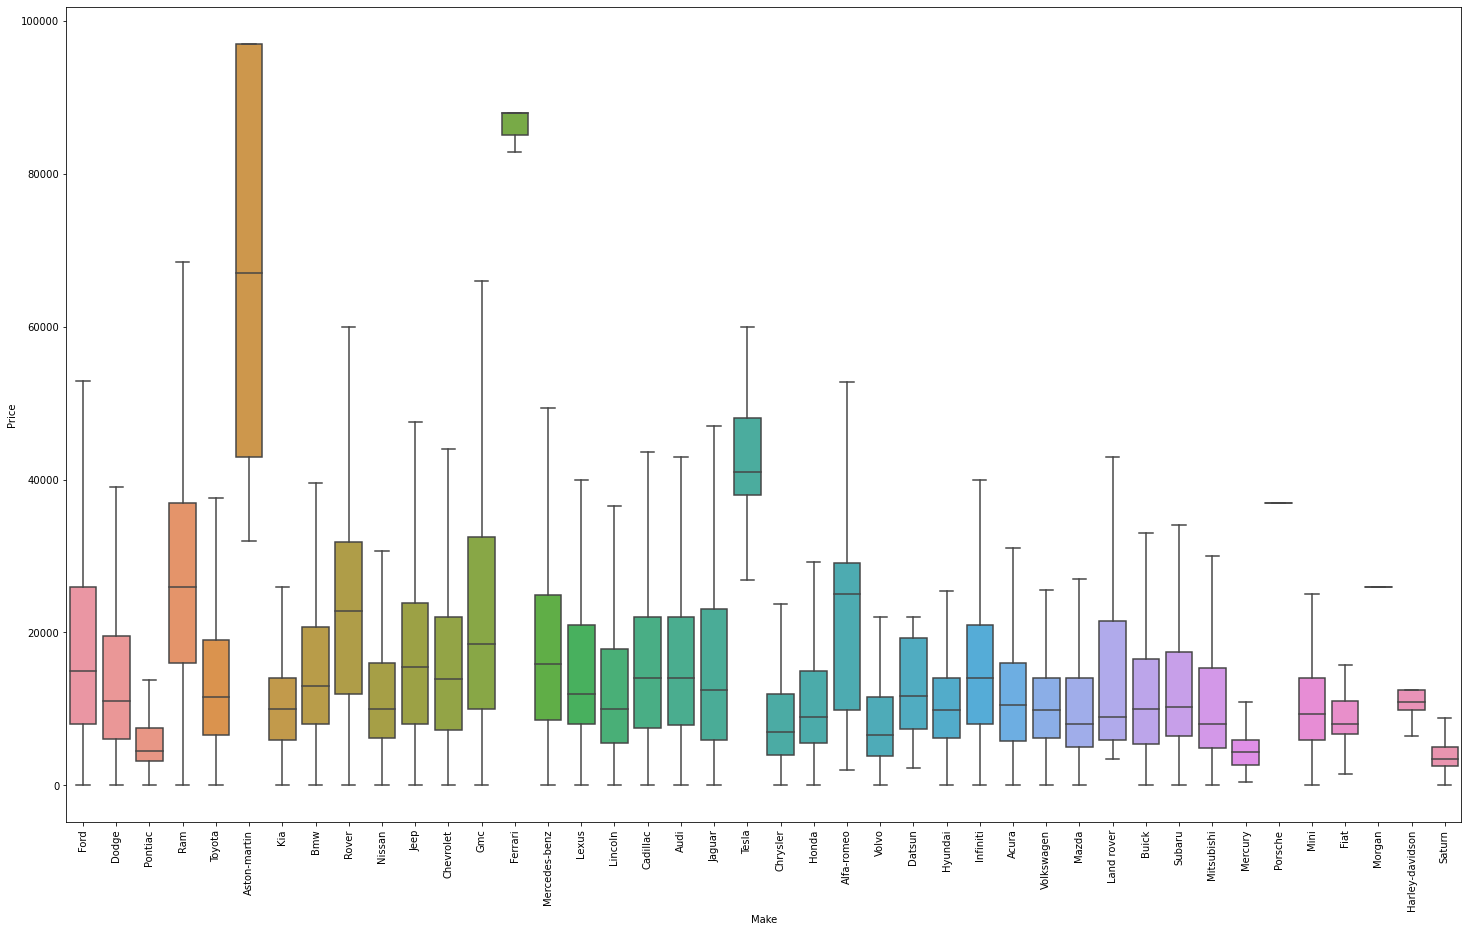

In [70]:
# Boxplot for price distribution for each manufacturer without outliers

clean_listings_df=clean_listings_df.sort_values(by=['Price'],ascending=False)
plt.figure(figsize=(25,15))
sns.boxplot(x=clean_listings_df.Make, y=clean_listings_df.Price, showfliers=False)
plt.xticks(rotation= 90)
plt.xlabel('Make')
plt.ylabel('Price')
plt.show()

As expected, we see that the exotic car brands have higher prices than other car brands, with Saturn being the cheapest on average.

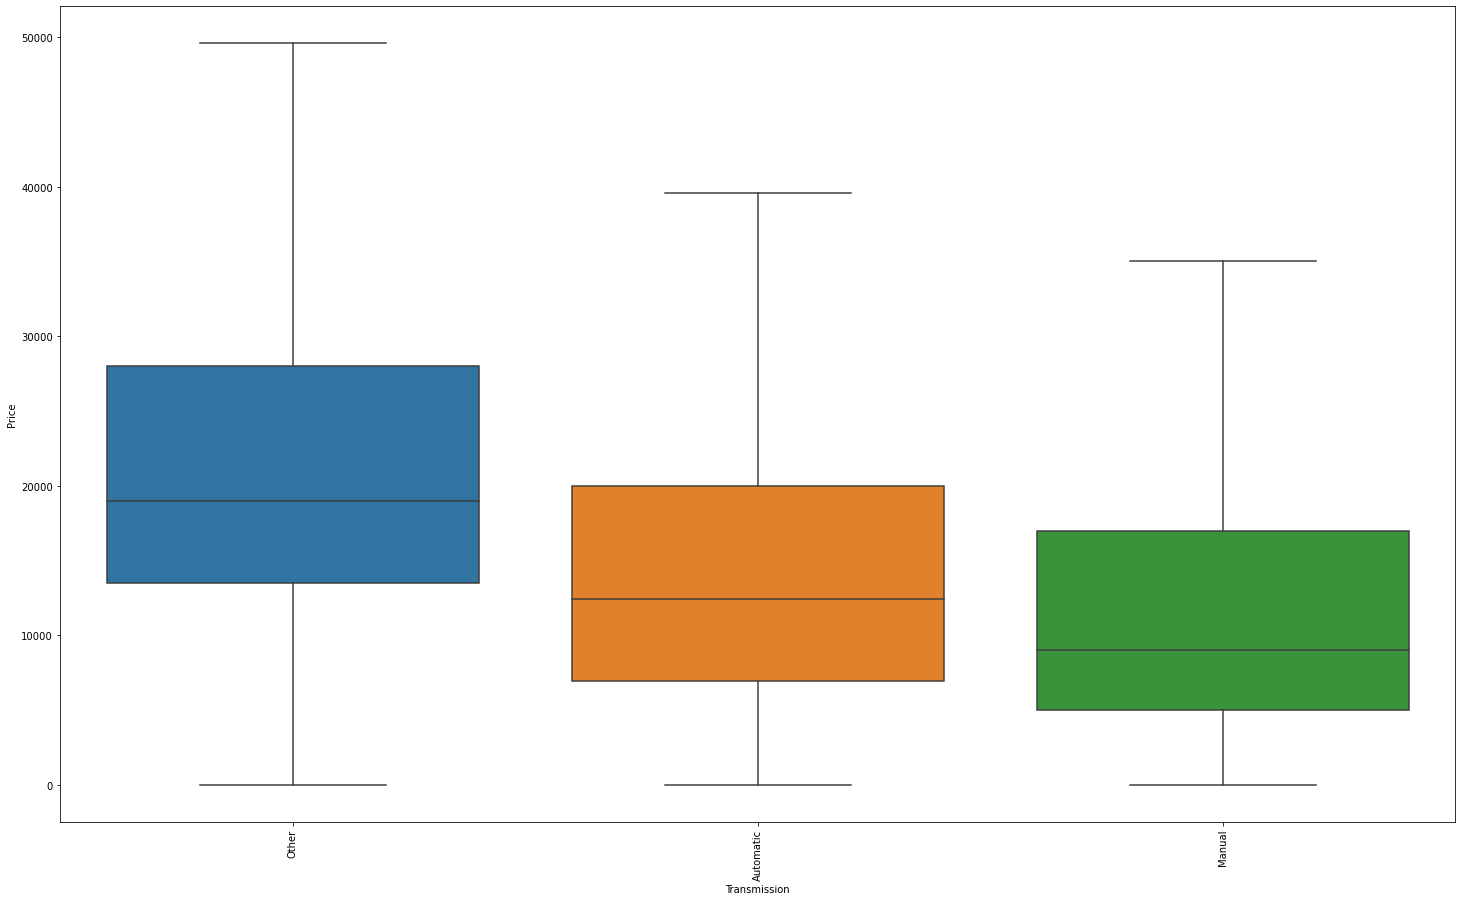

In [71]:
# Boxplot for price distribution for each transmission type without outliers

clean_listings_df=clean_listings_df.sort_values(by=['Price'],ascending=False)
plt.figure(figsize=(25,15))
sns.boxplot(x=clean_listings_df.Transmission, y=clean_listings_df.Price, showfliers=False)
plt.xticks(rotation= 90)
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

We see here that automatic transmission cars often command a price premium over manual cars. The 'other' section are likely a mix of automatics and manuals, if the owner did not fill out the listing properly. It could also refer to automated-manual gearboxes, which are common in some modern sports cars. This would help skew the prices upward, as we see in the boxplot.

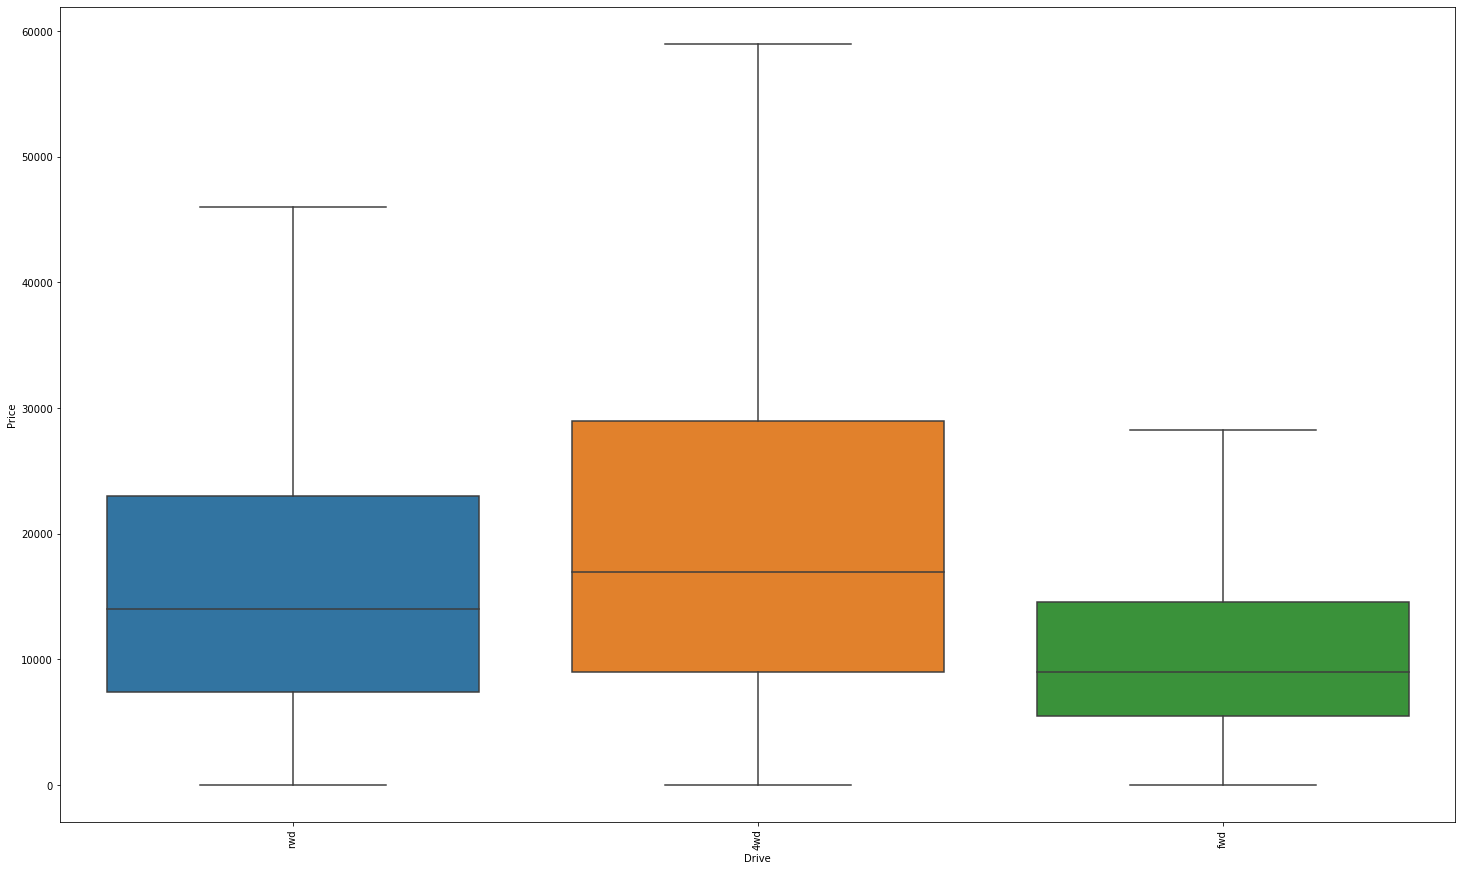

In [72]:
# Boxplot for price distribution for each drive type without outliers

clean_listings_df=clean_listings_df.sort_values(by=['Price'],ascending=False)
plt.figure(figsize=(25,15))
sns.boxplot(x=clean_listings_df.Drive, y=clean_listings_df.Price, showfliers=False)
plt.xticks(rotation= 90)
plt.xlabel('Drive')
plt.ylabel('Price')
plt.show()

As expected, we see that 4WD vehicles demand a price premium over RWD and FWD ones. 

This is due to a few factors:

    - 4WD cars are often more expensive than the same car with only two driven wheels.
    
    - In climates where 4WD is necessary, like in a snowy area, used cars in good condition command a price premium because of the shorter life span of cars in this environment, which results in a reduced supply of cars in good condition.
    
    - Many SUVs and trucks are 4WD, and these are typically more expensive body styles than a sedan or hatchback.

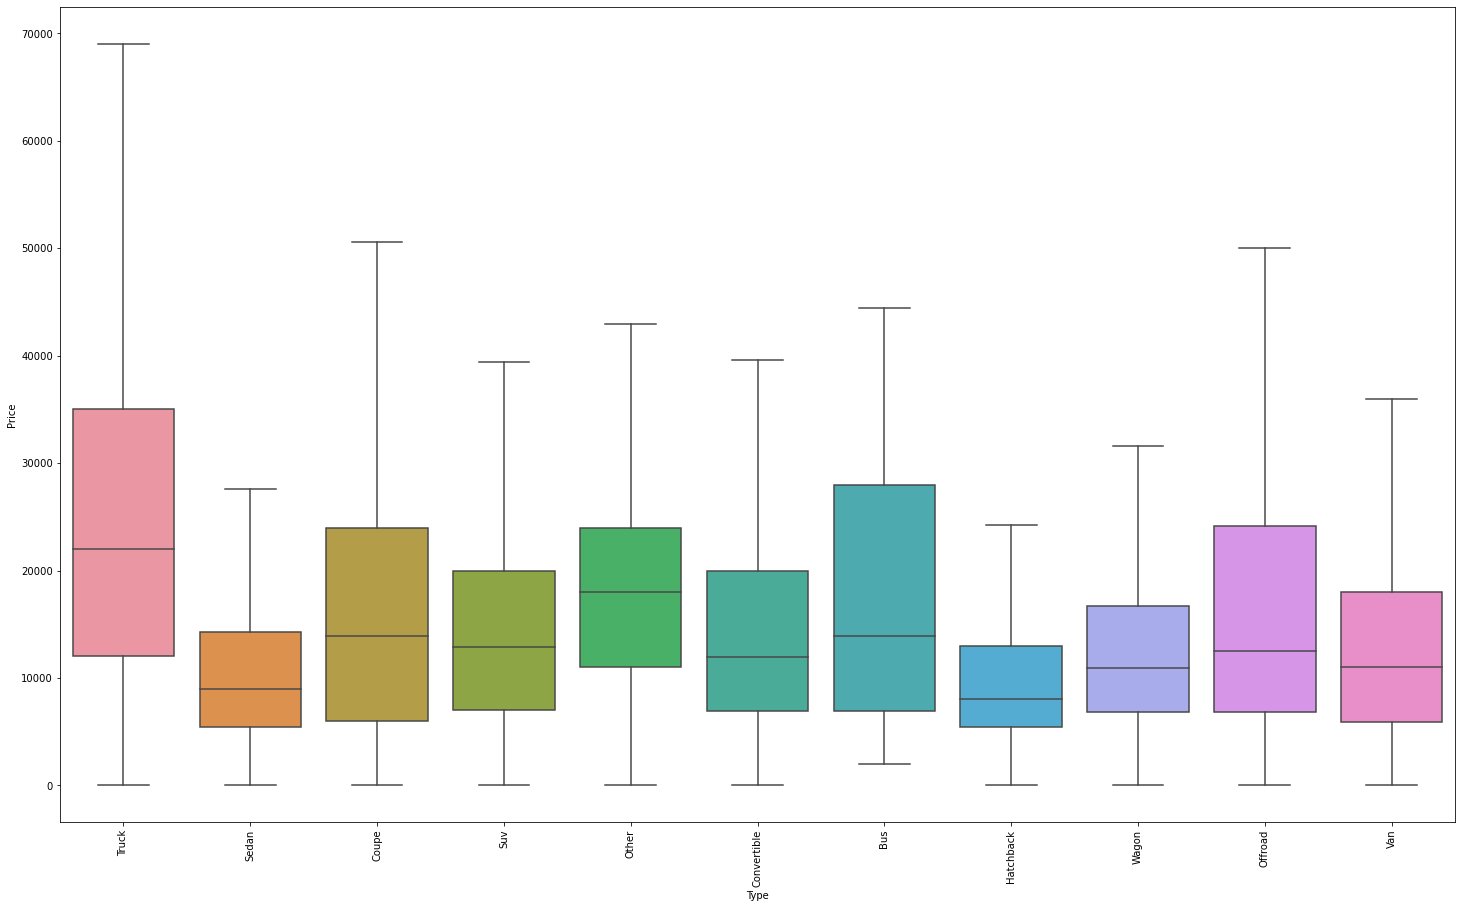

In [73]:
# Boxplot for price distribution for each body type without outliers

clean_listings_df=clean_listings_df.sort_values(by=['Price'],ascending=False)
plt.figure(figsize=(25,15))
sns.boxplot(x=clean_listings_df.Type, y=clean_listings_df.Price, showfliers=False)
plt.xticks(rotation= 90)
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

We see that trucks, in general, have a higher price than all other vehicle types. 

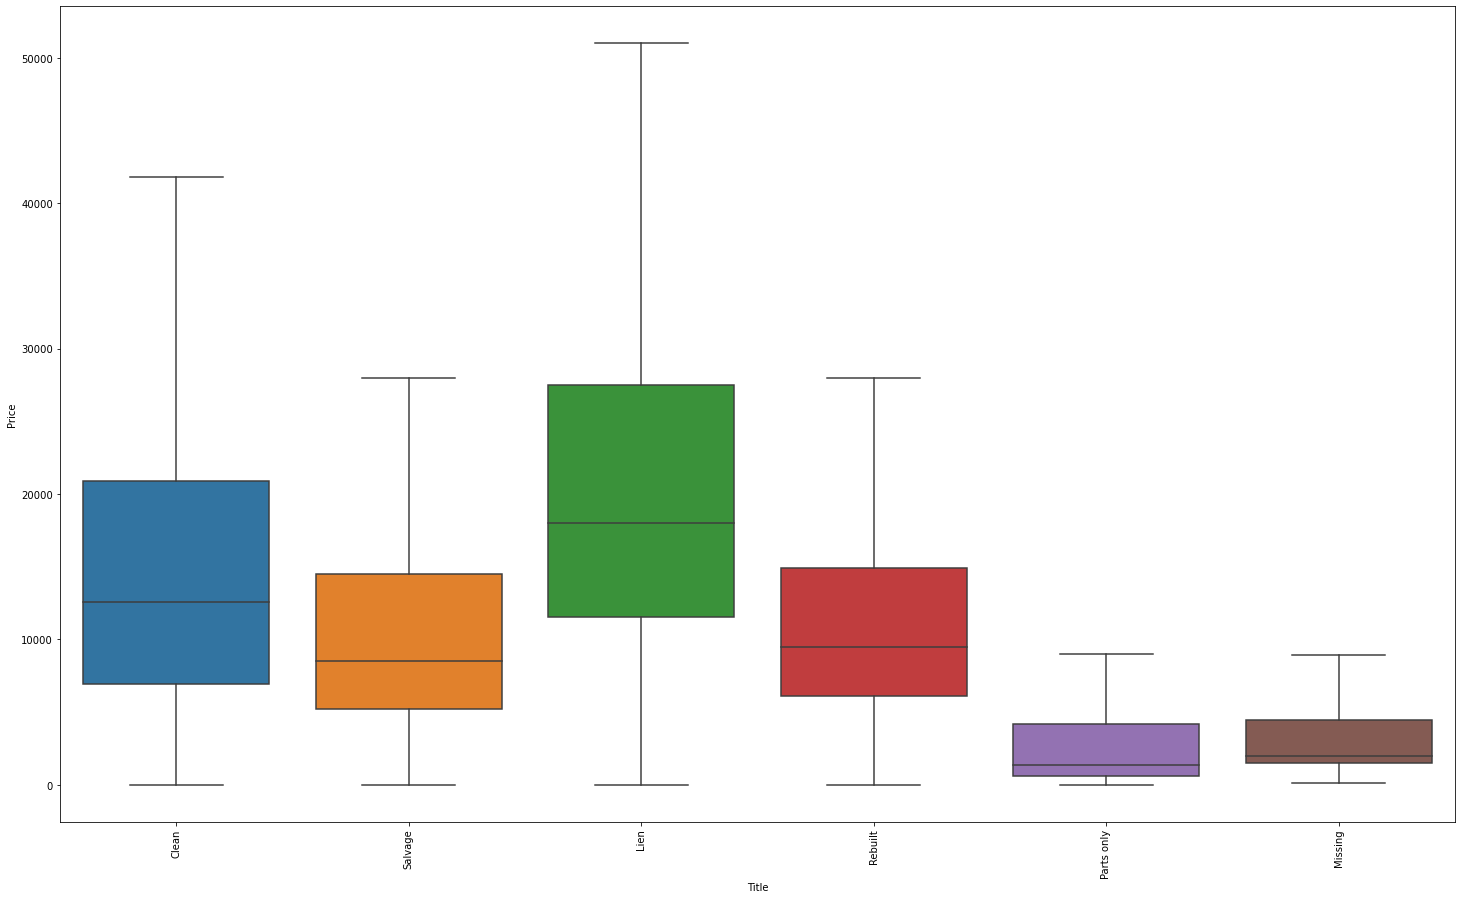

In [74]:
# Boxplot for price distribution for each title classification without outliers

clean_listings_df=clean_listings_df.sort_values(by=['Price'],ascending=False)
plt.figure(figsize=(25,15))
sns.boxplot(x=clean_listings_df.Title, y=clean_listings_df.Price, showfliers=False)
plt.xticks(rotation= 90)
plt.xlabel('Title')
plt.ylabel('Price')
plt.show()

We see that cars with clean titles have a higher asking price than salvage or rebuilt titles, as expected.

However, we also see that cars with liens on the title have even higher prices. This makes sense, as it likely refers to newer cars that still have a loan against them.

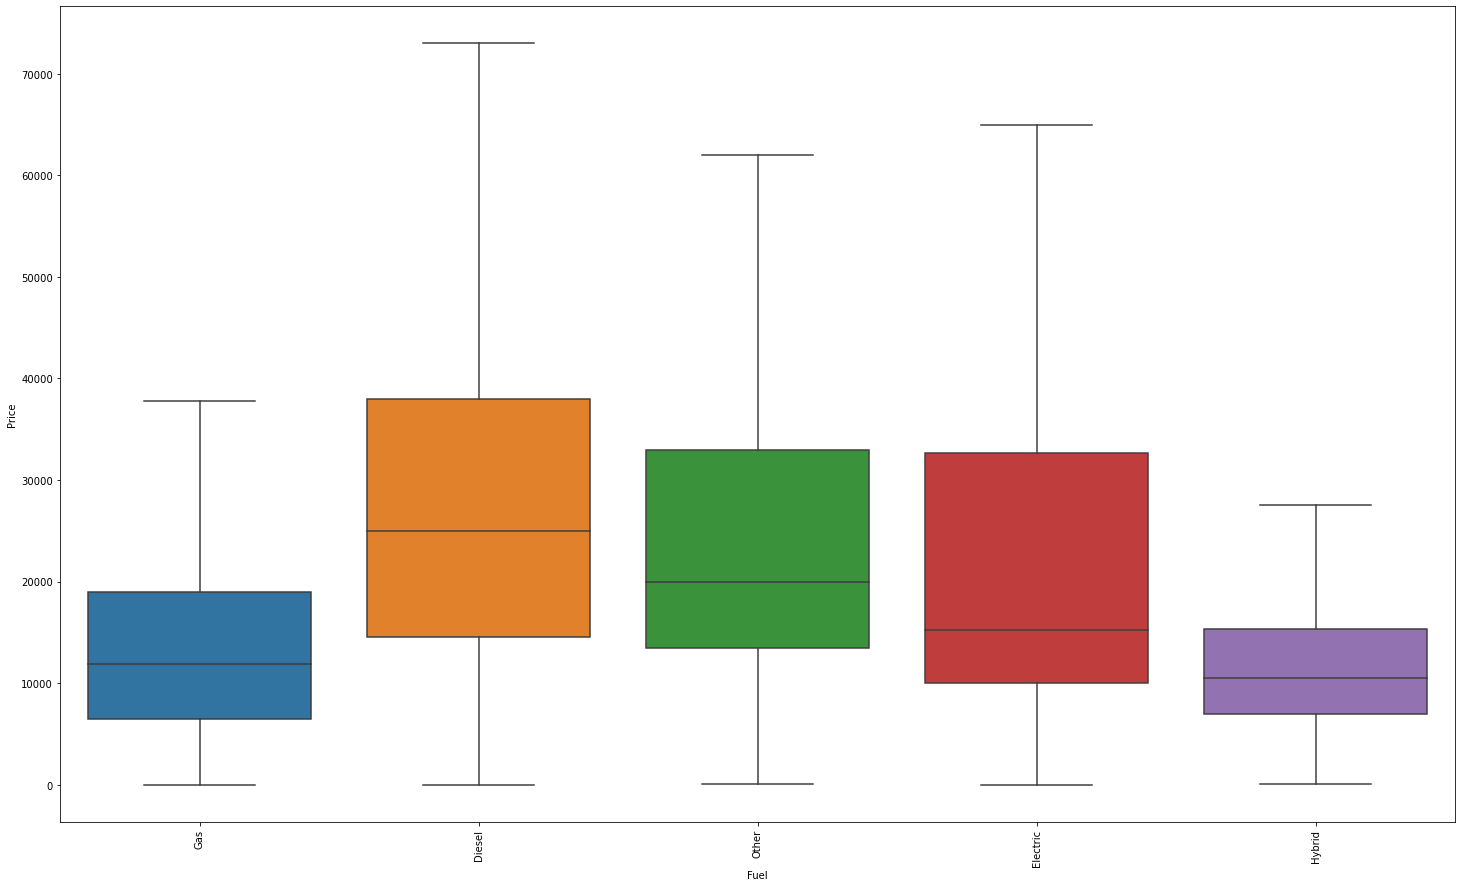

In [75]:
# Boxplot for price distribution for each fuel type without outliers

clean_listings_df=clean_listings_df.sort_values(by=['Price'],ascending=False)
plt.figure(figsize=(25,15))
sns.boxplot(x=clean_listings_df.Fuel, y=clean_listings_df.Price, showfliers=False)
plt.xticks(rotation= 90)
plt.xlabel('Fuel')
plt.ylabel('Price')
plt.show()

We see that diesel cars demand a premium in relation to other fuel types. This makes sense, as there are many high-dollar diesel trucks that hold their value on the used market.

<AxesSubplot:xlabel='Make', ylabel='count'>

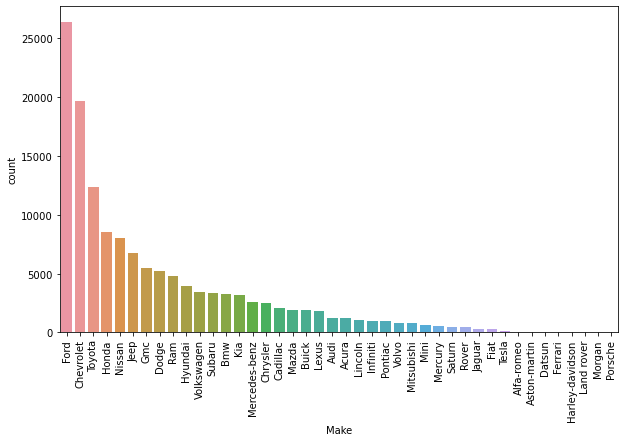

In [76]:
# Bar chart showing the number of listings per Make

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='Make', data=clean_listings_df, order = clean_listings_df['Make'].value_counts().index)

Fords are the most popular car on Craiglist, which should come as no surprise. On the other end, we find more exotic cars like Porsche and Morgan.

<AxesSubplot:xlabel='Type', ylabel='count'>

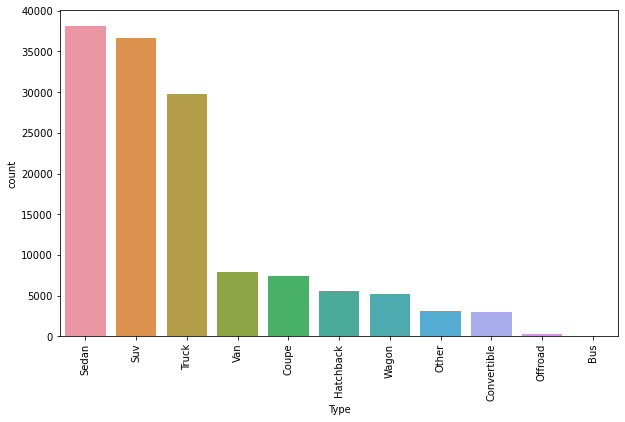

In [77]:
# Bar chart showing the number of listings per Type

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='Type', data=clean_listings_df, order = clean_listings_df['Type'].value_counts().index)

Unsurprisingly, the top three body types are sedans, SUVs, and trucks.

<AxesSubplot:xlabel='Fuel', ylabel='count'>

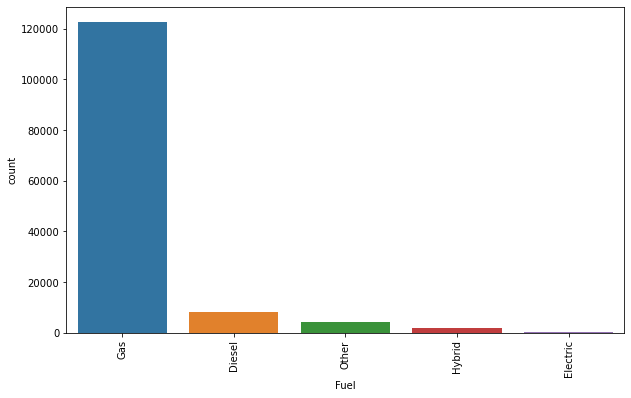

In [78]:
# Bar chart showing the number of listings per Fuel Type

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='Fuel', data=clean_listings_df, order = clean_listings_df['Fuel'].value_counts().index)

We see that a majority of the vehicles listed on Craigslist are gas powered, with electric vehicles being the smallest group. 

<b> Now that we have a general understanding of what the data looks like, let's look at the PowerBI dashboard that pulls all this information together.</b>